# TUGAS 1
**<p>Nama : Rizqi Hairunnisa</p>**
**<p>NIM  :  09011282126118 </p>**
**<p>Kelas:Kecerdasan Buatan SK5C </p>**

# <center> Implementasi Fuzzy Logic Metode Mamdani dalam Perancangan Sistem Peringatan Status Drop Out Mahasiswa Otomatis </center>

In [1]:
#Memanggil library/package yang digunakan
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctr 
import matplotlib.pyplot as plt 
%matplotlib inline 

# 1. Fuzzyfikasi

- Variabel Input : 
    - IPK : Bagus, Sedang, Buruk
    - Masa Studi : Standar, Berlebihan, Sangat Berlebihan
    - Ketidakhadiran : Tidak Pernah, Jarang, Sering
    - Cuti Semester : Tidak Pernah, Jarang, Sering
    
    
- Variabel Output : 
    - Status Mahasiswa :Aman, Terancam, Drop Out
        


| Variabel Input | Fuzzy Set Name    |  Domain  |
|----------------|-------------------|----------|
| IPK            | Bagus             | 2 -- 4   |
| IPK            | Sedang            | 1 -- 3   |
| IPK            | Kurang            | < 1      |
| Masa Studi     | Standar           | < 9      |
| Masa Studi     | Berlebihan        | 8 -- 12  |
| Masa Studi     | Sangat Berlebihan | 11 -- 14 |
| Ketidakhadiran | Tidak Pernah      | 0        |
| Ketidakhadiran | Jarang            | 0 -- 3   |
| Ketidakhadiran | Sering            | > 2      |
| Cuti Semester  | Tidak Pernah      | 0        |
| Cuti Semester  | Jarang            | 0 -- 3   |
| Cuti Semester  | Sering            | > 2      |

| Variabel Output |  Nilai    |  
|-----------------|-----------|
| Status          | > 60      | 
| Status          | 40 -- 50  | 
| Status          | < 40      | 



### Membership Function Variabel Input 'IPK'
$IPK [Buruk] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 2 \\
       {1-x \over 2-1} & \mbox{; } 1 ≤ x ≤ 2 \\
       1 & \mbox{; } x ≤ 2
    \end{array}
\right.$

$IPK [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 1 \ atau \ x\geq 3 \\
       {x-1 \over 2-1} & \mbox{; } 1 ≤ x ≤ 2 \\
       1 & \mbox{; } x = 2\\
       {2-x \over 3-2} & \mbox{; } 2 ≤ x ≤ 3 \\
    \end{array}
\right.$

$IPK [Bagus] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2 \\
       {x-2 \over 3-2} & \mbox{; } 2 ≤ x ≤ 3 \\
       1 & \mbox{; } x \geq 3
    \end{array}
\right.$

### Membership Function Variabel Output 'Masa Studi'
$Masa Studi[Standar] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 9\\
       {8-x \over 9-8} & \mbox{; } 8 ≤ x ≤ 9 \\
       1 & \mbox{; } x ≤ 8\\
    \end{array}
\right.$


 $Masa Studi[Berlebihan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 8 \ atau \ x \geq 13 \\
       {x-8 \over 9-8} & \mbox{; } 8 ≤ x ≤ 9 \\
       1 & \mbox{; } 9 ≤ x ≤ 12\\
       {9-x \over 12-13} & \mbox{; } 12 ≤ x ≤ 13 \\
    \end{array}
\right.$


 $Masa Studi[Sangat Berlebihan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 14\\
       {x-14 \over 15-14} & \mbox{; } 14 ≤ x ≤ 15 \\
       1 & \mbox{; } x \geq 15\\
    \end{array}
\right.$

### Membership Function Variabel Input 'Ketidakhadiran'
$Ketidakhadiran[Tidak Pernah] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 1\\
       {0-x \over 1-0} & \mbox{; } 0 ≤ x ≤ 1 \\
       1 & \mbox{; } x = 0\\
    \end{array}
\right.$


 $Ketidakhadiran[Jarang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 0 \ atau \ x \geq 2 \\
       {x-0 \over 1-0} & \mbox{; } 0 ≤ x ≤ 1 \\
       1 & \mbox{; }x = 1\\
       {1-x \over 2-1} & \mbox{; } 1 ≤ x ≤ 2 \\
    \end{array}
\right.$


 $Ketidakhadiran[Sering] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 1\\
       {x-1 \over 2-1} & \mbox{; } 1 ≤ x ≤ 2 \\
       1 & \mbox{; } x \geq 2\\
    \end{array}
\right.$

### Membership Function Variabel Input 'Cuti Semester'
$Cuti Semester[Tidak Pernah] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 1\\
       {0-x \over 1-0} & \mbox{; } 0 ≤ x ≤ 1 \\
       1 & \mbox{; } x = 0\\
    \end{array}
\right.$


 $Cuti Semester[Jarang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 0 \ atau \ x \geq 2 \\
       {x-0 \over 1-0} & \mbox{; } 0 ≤ x ≤ 1 \\
       1 & \mbox{; }x = 1\\
       {1-x \over 2-1} & \mbox{; } 1 ≤ x ≤ 2 \\
    \end{array}
\right.$


 $Cuti Semester[Sering] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 1\\
       {x-1 \over 2-1} & \mbox{; } 1 ≤ x ≤ 2 \\
       1 & \mbox{; } x \geq 2\\
    \end{array}
\right.$

### Membership Function Variabel Output 'Status'
$Status[Drop Out] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 40\\
       {40-x \over 50-40} & \mbox{; } 40 ≤ x ≤ 50 \\
       1 & \mbox{; } x ≤ 40\\
    \end{array}
\right.$


 $Status[Terancam] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 40 \ atau \ x \geq 60 \\
       {x-40 \over 50-40} & \mbox{; } 30 ≤ x ≤ 50 \\
       1 & \mbox{; }x = 50\\
       {50-x \over 60-50} & \mbox{; } 50 ≤ x ≤ 60 \\
    \end{array}
\right.$


 $Status[Aman] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 60\\
       {x-50 \over 60-50} & \mbox{; } 50 ≤ x ≤ 60 \\
       1 & \mbox{; } x \geq 60\\
    \end{array}
\right.$

In [2]:
#input
x_ipk = ctr.Antecedent(np.arange(0,5,1), 'x_ipk') 
x_masaStudi = ctr.Antecedent(np.arange(0,15,1), 'x_masaStudi')
x_ketidakhadiran = ctr.Antecedent(np.arange(0,4,1), 'x_ketidakhadiran')
x_cuti = ctr.Antecedent(np.arange(0,4,1), 'x_cuti')

#output
x_status = ctr.Consequent(np.arange(0, 100,1), 'x_status')

In [3]:
# mf Inputan IPK
x_ipk ['Buruk'] = fuzz.trapmf(x_ipk.universe, (0,0,1,2)) 
x_ipk ['Sedang'] = fuzz.trimf(x_ipk.universe, (1,2,3))
x_ipk ['Bagus'] = fuzz.trapmf(x_ipk.universe, (2,3,4,5))

# mf Inputan Masa Studi
x_masaStudi ['Standar'] = fuzz.trapmf(x_masaStudi.universe, (0,0,8,9))
x_masaStudi ['Berlebihan'] = fuzz.trapmf(x_masaStudi.universe, (8,9,12,13))
x_masaStudi ['Sangat Berlebihan'] = fuzz.trapmf(x_masaStudi.universe, (12,13,15,15))

# mf Inputan Ketidakhadiran
x_ketidakhadiran ['Tidak Pernah'] = fuzz.trapmf(x_ketidakhadiran.universe,(0,0,0,1))
x_ketidakhadiran ['Jarang'] = fuzz.trimf(x_ketidakhadiran.universe,(0,1,2))
x_ketidakhadiran ['Sering'] = fuzz.trapmf(x_ketidakhadiran.universe,(1,2,3,4))

# mf Inputan Cuti
x_cuti ['Tidak Pernah'] = fuzz.trapmf(x_cuti.universe,(0,0,0,1))
x_cuti ['Jarang'] = fuzz.trimf(x_cuti.universe,(0,1,2))
x_cuti ['Sering'] = fuzz.trapmf(x_cuti.universe,(1,2,3,4))

# mf Output Status
x_status ['Drop Out'] = fuzz.trapmf(x_status.universe, (0,0,40,50))
x_status ['Terancam'] = fuzz.trimf(x_status.universe, (40,50,60))
x_status ['Aman'] = fuzz.trapmf(x_status.universe, (50,60,100,100))


## Grafik Membership Function Tiap Variable

C:\Users\62877\miniconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


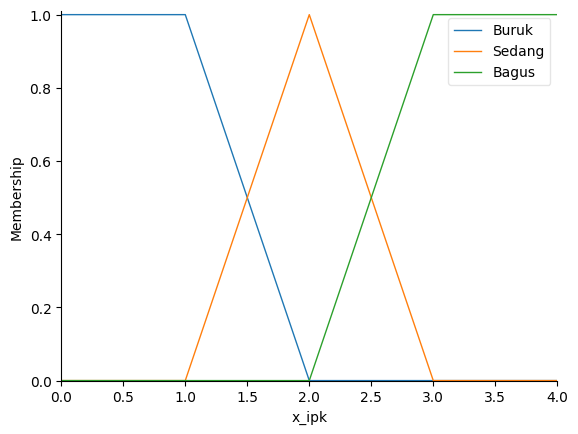

In [4]:
x_ipk.view();

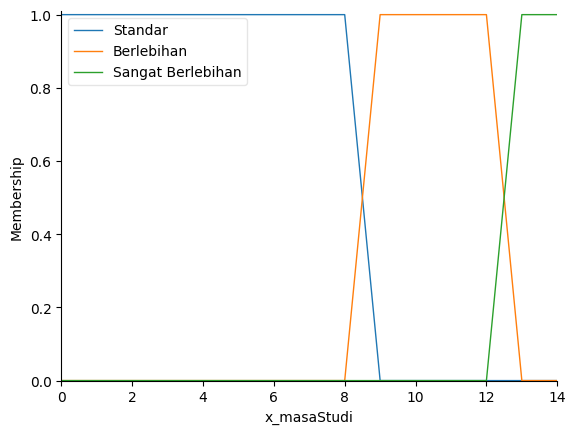

In [5]:
x_masaStudi.view()

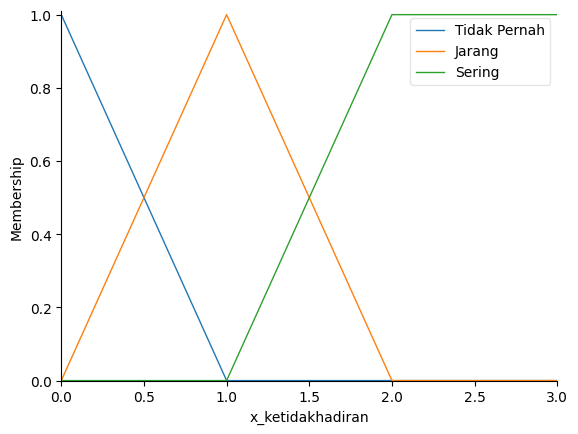

In [6]:
x_ketidakhadiran.view()

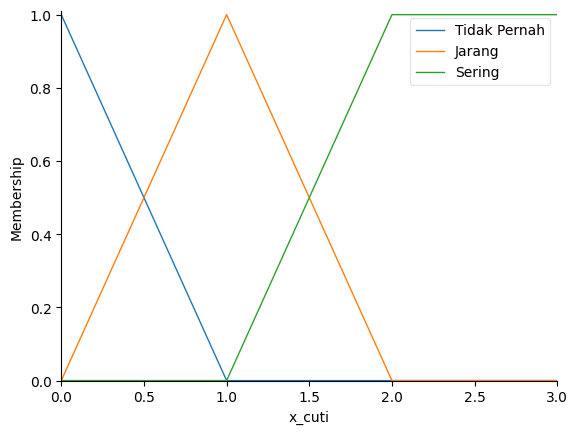

In [7]:
x_cuti.view()

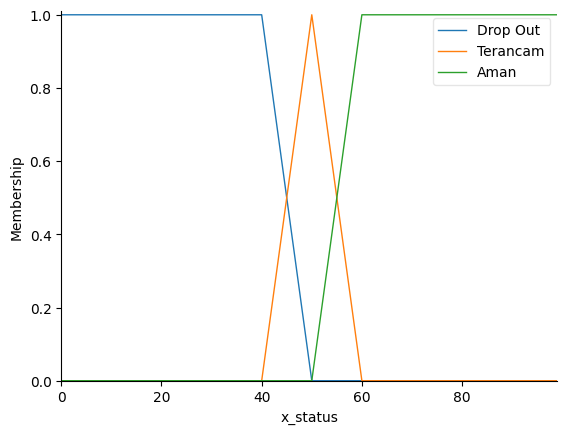

In [8]:
x_status.view()

## Rule Base

| No |    IPK   |     Masa Studi    | Ketidakhadiran | Tidak Isi cuti |   Status |
|----|----------|-------------------|----------------|----------------|----------|
| 1  |  Bagus   | Standar           |  Tidak Pernah  | Tidak Pernah   | Aman     |
| 2  |  Bagus   | Standar           |  Tidak Pernah  | Jarang         | Terancam |
| 3  |  Bagus   | Standar           |  Tidak Pernah  | Sering         | Drop Out |
| 4  |  Bagus   | Standar           |  Jarang        | Tidak Pernah   | Terancam |
| 5  |  Bagus   | Standar           |  Jarang        | Jarang         | Terancam |
| 6  |  Bagus   | Standar           |  Jarang        | Sering         | Drop Out |
| 7  |  Bagus   | Standar           |  Sering        | Tidak Penah    | Terancam |
| 8  |  Bagus   | Standar           |  Sering        | Jarang         | Terancam |
| 9  |  Bagus   | Standar           |  Sering        | Sering         | Drop Out |
| 10 |  Bagus   | Berlebihan        |  Tidak Pernah  | Tidak Pernah   | Terancam |
| 11 |  Bagus   | Berlebihan        |  Tidak Pernah  | Jarang         | Terancam |
| 12 |  Bagus   | Berlebihan        |  Tidak Pernah  | Sering         | Drop Out |
| 13 |  Bagus   | Berlebihan        |  Jarang        | Tidak Pernah   | Terancam |
| 14 |  Bagus   | Berlebihan        |  Jarang        | Jarang         | Terancam |
| 15 |  Bagus   | Berlebihan        |  Jarang        | Sering         | Drop Out |
| 16 |  Bagus   | Berlebihan        |  Sering        | Tidak Pernah   | Drop Out |
| 17 |  Bagus   | Berlebihan        |  Sering        | Jarang         | Drop Out |
| 18 |  Bagus   | Berlebihan        |  Sering        | Sering         | Drop Out |
| 19 |  Bagus   | Sangat Berlebihan |  Tidak Pernah  | Tidak Pernah   | Drop Out |
| 20 |  Bagus   | Sangat Berlebihan |  Tidak Pernah  | Jarang         | Drop Out |
| 21 |  Bagus   | Sangat Berlebihan |  Tidak Pernah  | Sering         | Drop Out |
| 22 |  Bagus   | Sangat Berlebihan |  Jarang        | Tidak Pernah   | Drop Out |
| 23 |  Bagus   | Sangat Berlebihan |  Jarang        | Jarang         | Drop Out |
| 24 |  Bagus   | Sangat Berlebihan |  Jarang        | Sering         | Drop Out |
| 25 |  Bagus   | Sangat Berlebihan |  Sering        | Tidak Pernah   | Drop Out |
| 26 |  Bagus   | Sangat Berlebihan |  Sering        | Jarang         | Drop Out |
| 27 |  Bagus   | Sangat Berlebihan |  Sering        | Sering         | Drop Out |
| 28 |  Sedang  | Standar           |  Tidak Pernah  | Tidak Pernah   | Aman     |
| 29 |  Sedang  | Standar           |  Tidak Pernah  | Jarang         | Terancam |
| 30 |  Sedang  | Standar           |  Tidak Pernah  | Sering         | Drop Out |
| 31 |  Sedang  | Standar           |  Jarang        | Tidak Pernah   | Terancam |
| 32 |  Sedang  | Standar           |  Jarang        | Jarang         | Terancam |
| 33 |  Sedang  | Standar           |  Jarang        | Sering         | Drop Out |
| 34 |  Sedang  | Standar           |  Sering        | Tidak Penah    | Drop Out |
| 35 |  Sedang  | Standar           |  Sering        | Jarang         | Drop Out |
| 36 |  Sedang  | Standar           |  Sering        | Sering         | Drop Out |
| 37 |  Sedang  | Berlebihan        |  Tidak Pernah  | Tidak Pernah   | Terancam |
| 38 |  Sedang  | Berlebihan        |  Tidak Pernah  | Jarang         | Terancam |
| 39 |  Sedang  | Berlebihan        |  Tidak Pernah  | Sering         | Drop Out |
| 40 |  Sedang  | Berlebihan        |  Jarang        | Tidak Pernah   | Terancam |
| 41 |  Sedang  | Berlebihan        |  Jarang        | Jarang         | Terancam |
| 42 |  Sedang  | Berlebihan        |  Jarang        | Sering         | Drop Out |
| 43 |  Sedang  | Berlebihan        |  Sering        | Tidak Pernah   | Drop Out |
| 44 |  Sedang  | Berlebihan        |  Sering        | Jarang         | Drop Out |
| 45 |  Sedang  | Berlebihan        |  Sering        | Sering         | Drop Out |
| 46 |  Sedang  | Sangat Berlebihan |  Tidak Pernah  | Tidak Pernah   | Drop Out |
| 47 |  Sedang  | Sangat Berlebihan |  Tidak Pernah  | Jarang         | Drop Out |
| 48 |  Sedang  | Sangat Berlebihan |  Tidak Pernah  | Sering         | Drop Out |
| 49 |  Sedang  | Sangat Berlebihan |  Jarang        | Tidak Pernah   | Drop Out |
| 50 |  Sedang  | Sangat Berlebihan |  Jarang        | Jarang         | Drop Out |
| 51 |  Sedang  | Sangat Berlebihan |  Jarang        | Sering         | Drop Out |
| 52 |  Sedang  | Sangat Berlebihan |  Sering        | Tidak Pernah   | Drop Out |
| 53 |  Sedang  | Sangat Berlebihan |  Sering        | Jarang         | Drop Out |
| 54 |  Sedang  | Sangat Berlebihan |  Sering        | Sering         | Drop Out |
| 55 |  Buruk   | Standar           |  Tidak Pernah  | Tidak Pernah   | Terancam |
| 56 |  Buruk   | Standar           |  Tidak Pernah  | Jarang         | Terancam |
| 57 |  Buruk   | Standar           |  Tidak Pernah  | Sering         | Drop Out |
| 58 |  Buruk   | Standar           |  Jarang        | Tidak Pernah   | Terancam |
| 59 |  Buruk   | Standar           |  Jarang        | Jarang         | Terancam |
| 60 |  Buruk   | Standar           |  Jarang        | Sering         | Drop Out |
| 61 |  Buruk   | Standar           |  Sering        | Tidak Penah    | Drop Out |
| 62 |  Buruk   | Standar           |  Sering        | Jarang         | Drop Out |
| 63 |  Buruk   | Standar           |  Sering        | Sering         | Drop Out |
| 64 |  Buruk   | Berlebihan        |  Tidak Pernah  | Tidak Pernah   | Terancam |
| 65 |  Buruk   | Berlebihan        |  Tidak Pernah  | Jarang         | Terancam |
| 66 |  Buruk   | Berlebihan        |  Tidak Pernah  | Sering         | Drop Out |
| 67 |  Buruk   | Berlebihan        |  Jarang        | Tidak Pernah   | Terancam |
| 68 |  Buruk   | Berlebihan        |  Jarang        | Jarang         | Terancam |
| 69 |  Buruk   | Berlebihan        |  Jarang        | Sering         | Drop Out |
| 70 |  Buruk   | Berlebihan        |  Sering        | Tidak Pernah   | Drop Out |
| 71 |  Buruk   | Berlebihan        |  Sering        | Jarang         | Drop Out |
| 72 |  Buruk   | Berlebihan        |  Sering        | Sering         | Drop Out |
| 73 |  Buruk   | Sangat Berlebihan |  Tidak Pernah  | Tidak Pernah   | Drop Out |
| 74 |  Buruk   | Sangat Berlebihan |  Tidak Pernah  | Jarang         | Drop Out |
| 75 |  Buruk   | Sangat Berlebihan |  Tidak Pernah  | Sering         | Drop Out |
| 76 |  Buruk   | Sangat Berlebihan |  Jarang        | Tidak Pernah   | Drop Out |
| 77 |  Buruk   | Sangat Berlebihan |  Jarang        | Jarang         | Drop Out |
| 78 |  Buruk   | Sangat Berlebihan |  Jarang        | Sering         | Drop Out |
| 79 |  Buruk   | Sangat Berlebihan |  Sering        | Tidak Pernah   | Drop Out |
| 80 |  Buruk   | Sangat Berlebihan |  Sering        | Jarang         | Drop Out |
| 81 |  Buruk   | Sangat Berlebihan |  Sering        | Sering         | Drop Out |


In [9]:
rule1 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Aman'])
rule2 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Terancam'])
rule3 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule4 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Terancam'])
rule5 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Terancam'])
rule6 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule7 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule8 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule9 = ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Standar']           & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])

rule10= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Terancam'])
rule11= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Terancam'])
rule12= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule13= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Terancam'])
rule14= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Terancam'])
rule15= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule16= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule17= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule18= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])

rule19= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule20= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Drop Out'])
rule21= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule22= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule23= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule24= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule25= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule26= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule27= ctr.Rule(x_ipk['Bagus'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])

rule28= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Aman'])
rule29= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Terancam'])
rule30= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule31= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Terancam'])
rule32= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Terancam'])
rule33= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule34= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule35= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule36= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Standar']          & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])

rule37= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Terancam'])
rule38= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Terancam'])
rule39= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule40= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Terancam'])
rule41= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Terancam'])
rule42= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule43= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule44= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule45= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])

rule46= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule47= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Drop Out'])
rule48= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule49= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule50= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule51= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule52= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule53= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule54= ctr.Rule(x_ipk['Sedang'] & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])

rule55= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule56= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Drop Out'])
rule57= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule58= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule59= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule60= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule61= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule62= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule63= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Standar']           & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])
   
rule64= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule65= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Drop Out'])
rule66= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule67= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule68= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule69= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule70= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule71= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule72= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Berlebihan']        & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])

rule73= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule74= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Jarang']       ,x_status['Drop Out'])
rule75= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Tidak Pernah'] & x_cuti['Sering']       ,x_status['Drop Out'])
rule76= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule77= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule78= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Jarang']       & x_cuti['Sering']       ,x_status['Drop Out'])
rule79= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Tidak Pernah'] ,x_status['Drop Out'])
rule80= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Jarang']       ,x_status['Drop Out'])
rule81= ctr.Rule(x_ipk['Buruk']  & x_masaStudi['Sangat Berlebihan'] & x_ketidakhadiran['Sering']       & x_cuti['Sering']       ,x_status['Drop Out'])


(<Figure size 640x480 with 1 Axes>, <Axes: >)

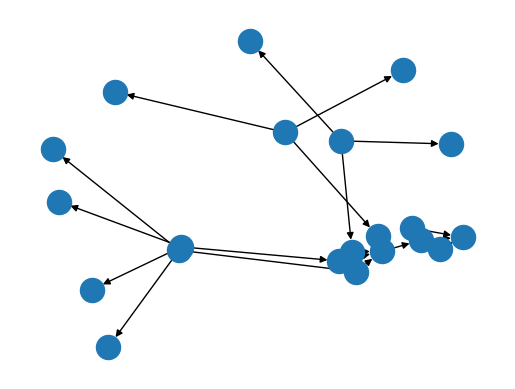

In [10]:
rule1.view() # Visualisasi sample dari rule 1

# 2. Fuzzy Inference

In [11]:
# Membuat kontrol sistem yang kondisinya diambil berdasarkan aturan atau rule yang telah dibuat
status_rule1= ctr.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                        rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
                        rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27,
                        rule28, rule29, rule30, rule31, rule32, rule33, rule34,rule35, rule36,
                        rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45,
                        rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54,
                        rule55, rule56, rule57, rule58, rule59, rule60, rule61, rule62, rule63,
                        rule64, rule65, rule66, rule67, rule68, rule69, rule70, rule71, rule72, 
                        rule73, rule74, rule75, rule76, rule77, rule78, rule79, rule80, rule81,
])

In [12]:
# Membuat simulasi kontrolsistem yang kondisinya diambil berdasarkan status_rule1 /sistem kontrol yang telah kita buat
status = ctr.ControlSystemSimulation(status_rule1)

# 3. Defuzzyfikasi


<h1 align = "left"> <font color='red'> Contoh Kasus </h1> </font>
Seorang mahasiswa memiliki IPK sebesar 2.5 dan sudah menempuh studi selama 14 semester. Mahasiswa tersebut tidak pernah alpha bahkan cuti. Bagaimana status mahasiswa tersebut?

- IPK = 2.5 (Sedang)
- Masa Studi = 14 semester (Sangat Berlebihan)
- Ketidakhadiran = 0 kali (Tidak Pernah)
- Cuti = 0 kali (Tidak Pernah)

Menurut rule base yang telah ditetapkan `(rule46)` , maka status mahasiswa tersebut terkena Drop Out. 

1. $Input.IPK[2.5] =
\left\{
    \begin{array}{ll}
       {2.5-1 \over 2-1} = 1.5 \\
       {2.5-2 \over 3-2} = 0.5 \\
    \end{array}
\right.$



2. $Input.Masa Studi[14] =
\left\{
    \begin{array}{ll}
       {0} = 0.0 \\
       {14-14 \over 15-14} = 0.0 \\
    \end{array}
\right.$
    
3. $Input.Ketidakhadiran[0] =
\left\{
    \begin{array}{ll}
       {0-0 \over 1-0} = 0.0 \\
       {0-0 \over 1-0} = 0.0 \\
    \end{array}
\right.$
    
4. $Input.Cuti[14] =
\left\{
    \begin{array}{0}
       {0-0 \over 1-0} = 0.0 \\
       {0-0 \over 1-0} = 0.0 \\
    \end{array}
\right.$

In [13]:
#Membuat interupsi inputan dari keyboard
ipk       = input("IPK Mahasiswa: ")
masaStudi = input("Masa studi Mahasiswa (Semester): ")
ketidakhadiran = input("Ketidakhadiran Mahasiswa : ")
cutiSemester = input("Cuti Semester sebanyak: ")

IPK Mahasiswa: 2.5
Masa studi Mahasiswa (Semester): 14
Ketidakhadiran Mahasiswa : 0
Cuti Semester sebanyak: 0


In [14]:
status.input['x_ipk'] = float(ipk)
status.input['x_masaStudi'] = float(masaStudi)
status.input['x_ketidakhadiran'] = float(ketidakhadiran)
status.input['x_cuti'] = float(cutiSemester)

status.compute()

In [15]:
print(status.output['x_status']) 

23.771929824561404


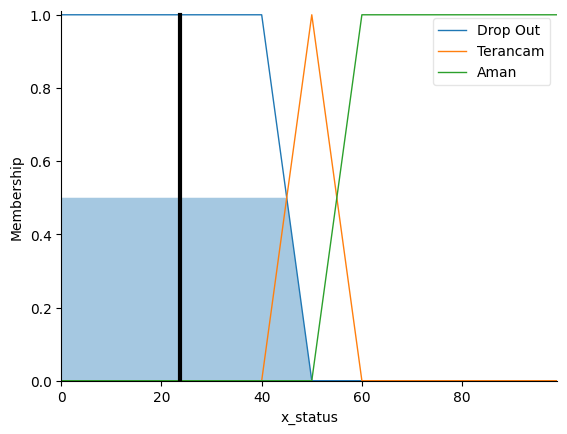

In [16]:
x_status.view(sim=status);